In [2]:
import pandas as pd 
import string
from underthesea import word_tokenize

In [3]:
df = pd.read_json("Dataset\data_posts.json")

In [4]:
# Remove 'attachments' and 'user' columns
df.drop(columns=['attachments', 'user'], inplace=True)

In [4]:
df.head()

,likesCount,commentsCount,id,sharesCount,postId,hashtag,date,viewsCount,text,url,sharedPost,inputUrl
0,17.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTk5NDEzNzY4NDExMD...,1.0,8.199414e+14,pensiliahcm,2024-03-19 05:00:40+00:00,182.0,Có phương nào phục hồi da nhiễm Corticoid khôn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN
1,2.0,0.0,UzpfSTEwMDA2NTMxOTY2NzU3NDo3NzQxNTY5NTE0MzgyOD...,0.0,7.741570e+14,pensiliahcm,2024-03-19 10:37:43+00:00,NaN,LÃO HÓA TRÊN GƯƠNG MẶT BẮT ĐẦU TỪ NHỮNG DẤU HI...,https://www.facebook.com/pensiliasaigon/posts/...,NaN,NaN
2,16.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MjEzMTg2NjY3MDMzNz...,1.0,8.213187e+14,pensiliahcm,2024-03-21 08:30:22+00:00,171.0,Cấy tinh chất tạo nét cân chỉnh toàn diện gươn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN
3,18.0,2.0,UzpfSTEwMDA2MzkyODc1MDE4NTo2ODY2MjE0MjY4MTIxND...,0.0,6.866214e+14,pensiliahcm,2023-07-19 03:12:39+00:00,107.0,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,https://www.facebook.com/PhongkhamPensiliaBien...,NaN,NaN
4,9.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTc5Mjc3MTAzNzU4MD...,0.0,8.179277e+14,pensiliahcm,2024-03-16 01:00:35+00:00,221.0,Trán hõm má hóp có làm đầy bằng tinh chất được...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN


In [5]:
summary_stats = df[['likesCount', 'sharesCount', 'commentsCount']].describe()
print(summary_stats)


        likesCount  sharesCount  commentsCount
count   385.000000   385.000000     385.000000
mean     46.963636     0.789610       4.194805
std     118.568101     1.945855      19.589963
min       0.000000     0.000000       0.000000
25%       6.000000     0.000000       0.000000
50%      16.000000     0.000000       0.000000
75%      27.000000     1.000000       2.000000
max    1047.000000    21.000000     280.000000


In [6]:
import matplotlib.pyplot as plt

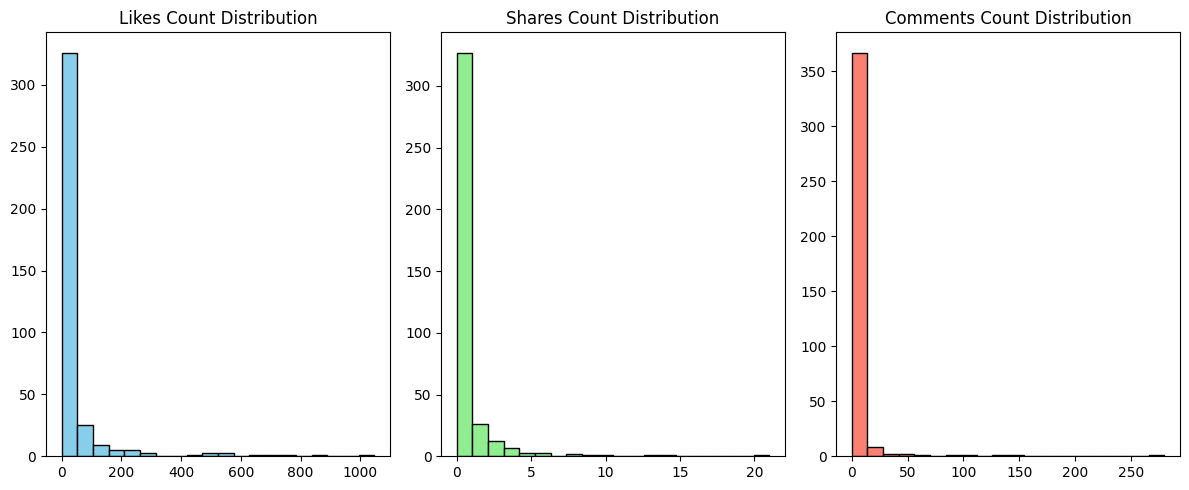


Missing Values:
likesCount         2
commentsCount      2
id                 2
sharesCount        2
postId             2
hashtag            2
date               2
viewsCount       106
text               2
url                2
sharedPost       384
inputUrl         385
dtype: int64


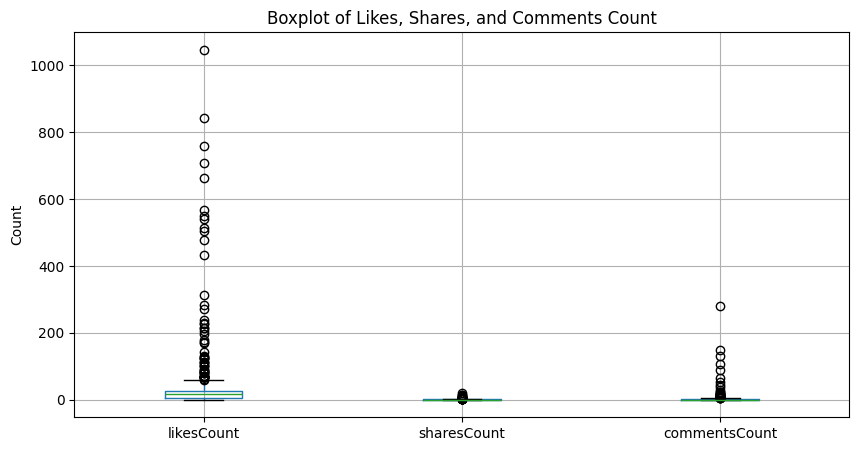

In [8]:
# 2. Distribution Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(df['likesCount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Likes Count Distribution')

plt.subplot(1, 3, 2)
plt.hist(df['sharesCount'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Shares Count Distribution')

plt.subplot(1, 3, 3)
plt.hist(df['commentsCount'], bins=20, color='salmon', edgecolor='black')
plt.title('Comments Count Distribution')

plt.tight_layout()
plt.show()

# 3. Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# 4. Outliers Detection (using boxplot)
plt.figure(figsize=(10, 5))
df.boxplot(column=['likesCount', 'sharesCount', 'commentsCount'])
plt.title('Boxplot of Likes, Shares, and Comments Count')
plt.ylabel('Count')
plt.show()

In [ ]:
# Function for loading stopwords from a file
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = file.readlines()
    # Remove leading and trailing whitespaces, and newline characters
    stopwords = [word.strip() for word in stopwords]
    return stopwords

# Load Vietnamese stopwords from the file
stopwords_file = "Dataset/stopwords.txt"
vietnamese_stopwords = load_stopwords(stopwords_file)

In [6]:
import re
def preprocess_text_vietnamese(text):
    text = str(text)
    # Lowercase
    text = text.lower()
    # Tokenization
    # Remove integers
    text = re.sub(r'\d+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if token not in string.punctuation]
    # Removing stopwords
    tokens = [token for token in tokens if token not in vietnamese_stopwords]
    # Lemmatization (Vietnamese doesn't have stemming, so we skip this)
    return tokens


In [7]:
# Apply preprocessing to the 'text' column
df['processed_text_vietnamese'] = df['text'].apply(preprocess_text_vietnamese)


In [8]:
df.head()

,likesCount,commentsCount,id,sharesCount,postId,hashtag,date,viewsCount,text,url,sharedPost,inputUrl,processed_text_vietnamese
0,17.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTk5NDEzNzY4NDExMD...,1.0,8.199414e+14,pensiliahcm,2024-03-19 05:00:40+00:00,182.0,Có phương nào phục hồi da nhiễm Corticoid khôn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[phương, phục hồi, da, nhiễm, corticoid, bác s..."
1,2.0,0.0,UzpfSTEwMDA2NTMxOTY2NzU3NDo3NzQxNTY5NTE0MzgyOD...,0.0,7.741570e+14,pensiliahcm,2024-03-19 10:37:43+00:00,NaN,LÃO HÓA TRÊN GƯƠNG MẶT BẮT ĐẦU TỪ NHỮNG DẤU HI...,https://www.facebook.com/pensiliasaigon/posts/...,NaN,NaN,"[lão, hóa, gương mặt, dấu hiệu, lão, hóa, cơ c..."
2,16.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MjEzMTg2NjY3MDMzNz...,1.0,8.213187e+14,pensiliahcm,2024-03-21 08:30:22+00:00,171.0,Cấy tinh chất tạo nét cân chỉnh toàn diện gươn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[cấy, tinh chất, nét, cân chỉnh, toàn diện, gư..."
3,18.0,2.0,UzpfSTEwMDA2MzkyODc1MDE4NTo2ODY2MjE0MjY4MTIxND...,0.0,6.866214e+14,pensiliahcm,2023-07-19 03:12:39+00:00,107.0,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,https://www.facebook.com/PhongkhamPensiliaBien...,NaN,NaN,"[góc, xinh đẹp, pensilia, chi nhánh, đồng, nai..."
4,9.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTc5Mjc3MTAzNzU4MD...,0.0,8.179277e+14,pensiliahcm,2024-03-16 01:00:35+00:00,221.0,Trán hõm má hóp có làm đầy bằng tinh chất được...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[trán, hõm, má, hóp, tinh chất, bs, cki hoàng ..."


In [9]:
lst_words = []
for window in df['processed_text_vietnamese']:
    for word in window: 
        lst_words.append(word)

In [10]:
lst_words

['phương',
 'phục hồi',
 'da',
 'nhiễm',
 'corticoid',
 'bác sĩ',
 'bác sĩ',
 'cki hoàng thị',
 'hồng trâm',
 'pensilia',
 'pensiliahcm',
 'phục_hồi_da',
 'lão',
 'hóa',
 'gương mặt',
 'dấu hiệu',
 'lão',
 'hóa',
 'cơ chế',
 'tự nhiên',
 'cơ thể',
 'con người',
 'giai đoạn',
 'trở',
 'đi',
 'làn',
 'da',
 'gương mặt',
 'dễ dàng',
 'dấu hiệu',
 'lão',
 'hóa',
 'da',
 'sạm',
 'màu',
 'làn',
 'da',
 'sạm',
 'màu',
 'sạm',
 'hai',
 'má',
 'trán',
 'da mắt',
 'sắc tố',
 'sậm',
 'màu',
 'đốm',
 'nâu',
 'gương mặt',
 'đi độ',
 'căng',
 'bóng',
 'khô',
 'sần',
 'rãnh',
 'cười',
 'sâu',
 'dấu hiệu',
 'dễ dàng',
 'báo hiệu',
 'lão',
 'hóa',
 'nếp',
 'gấp',
 'cánh',
 'mũi',
 'sâu',
 'thông thường',
 'da',
 'trẻ',
 'rãnh',
 'cười',
 'hằn',
 'cười',
 'nếp',
 'gấp',
 'gương mặt',
 'chảy',
 'xế',
 'lộ',
 'khuyết điểm',
 'nếp',
 'nhăn',
 'đuôi',
 'mắt',
 'cau mày',
 'bảo',
 'nếp',
 'nhăn',
 'dấu hiệu',
 'tuổi tác',
 'báo động',
 'chất lượng',
 'cấu trúc',
 'da',
 'mặt',
 'xuống cấp',
 'giải pháp',
 'x

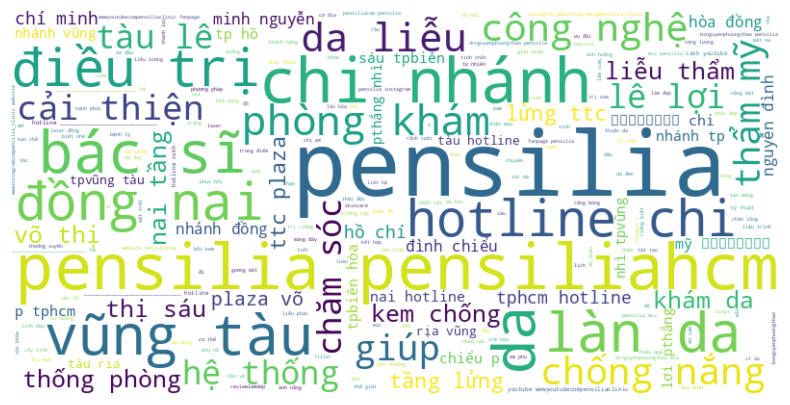

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the preprocessed text into a single string
all_text = ' '.join(df['processed_text_vietnamese'].sum())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


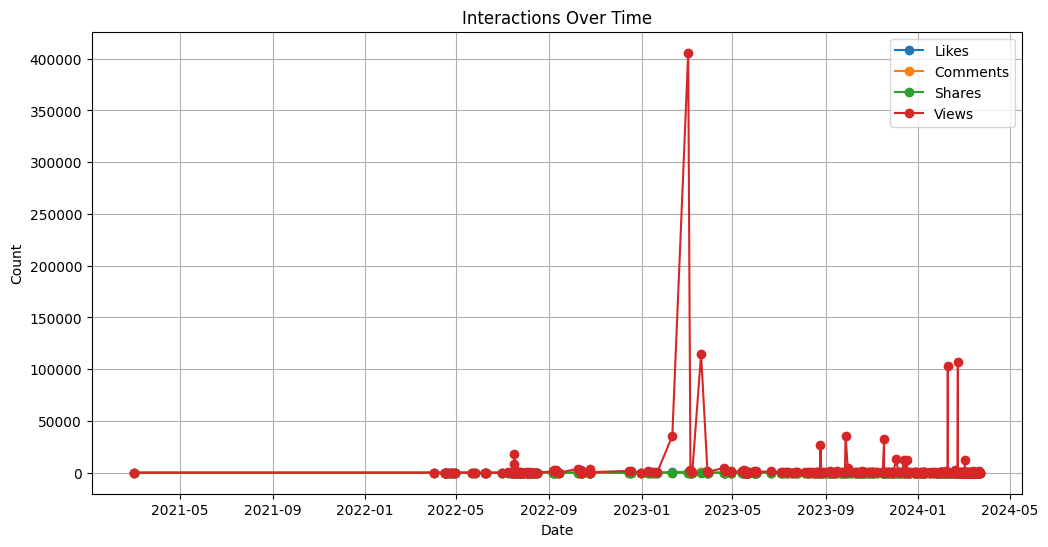

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into a DataFrame called df

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Aggregate interactions by date
interactions_by_date = df.groupby('date').agg({
    'likesCount': 'sum',
    'commentsCount': 'sum',
    'sharesCount': 'sum',
    'viewsCount': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(interactions_by_date['date'], interactions_by_date['likesCount'], label='Likes', marker='o')
plt.plot(interactions_by_date['date'], interactions_by_date['commentsCount'], label='Comments', marker='o')
plt.plot(interactions_by_date['date'], interactions_by_date['sharesCount'], label='Shares', marker='o')
plt.plot(interactions_by_date['date'], interactions_by_date['viewsCount'], label='Views', marker='o')

plt.title('Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()


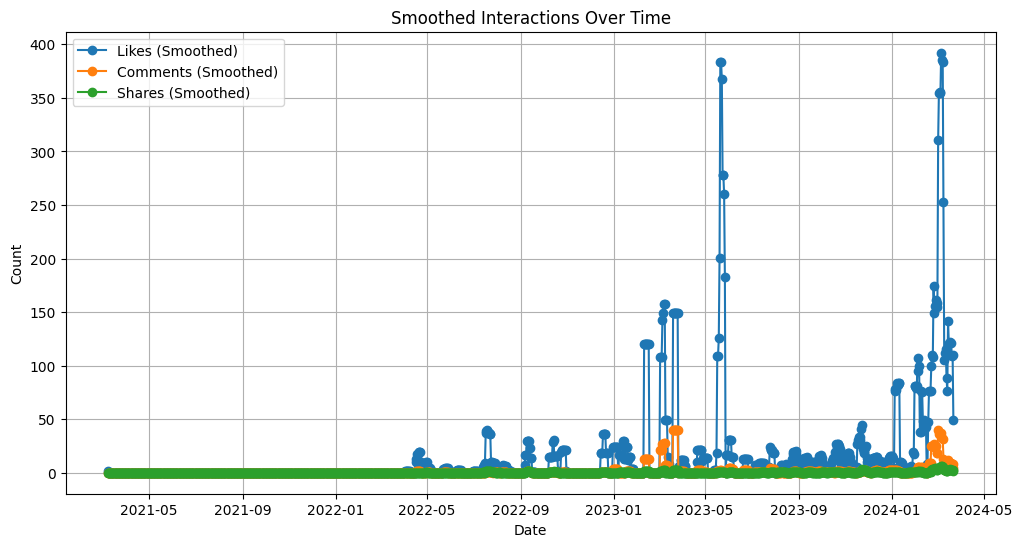

In [13]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
df.set_index('date', inplace=True)

# Aggregate interactions by date
interactions_by_date = df.resample('D').agg({
    'likesCount': 'sum',
    'commentsCount': 'sum',
    'sharesCount': 'sum',
})

# Smooth data using moving averages
window_size = 7  # Adjust the window size as needed
interactions_by_date_smoothed = interactions_by_date.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(interactions_by_date_smoothed.index, interactions_by_date_smoothed['likesCount'], label='Likes (Smoothed)', marker='o')
plt.plot(interactions_by_date_smoothed.index, interactions_by_date_smoothed['commentsCount'], label='Comments (Smoothed)', marker='o')
plt.plot(interactions_by_date_smoothed.index, interactions_by_date_smoothed['sharesCount'], label='Shares (Smoothed)', marker='o')

plt.title('Smoothed Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

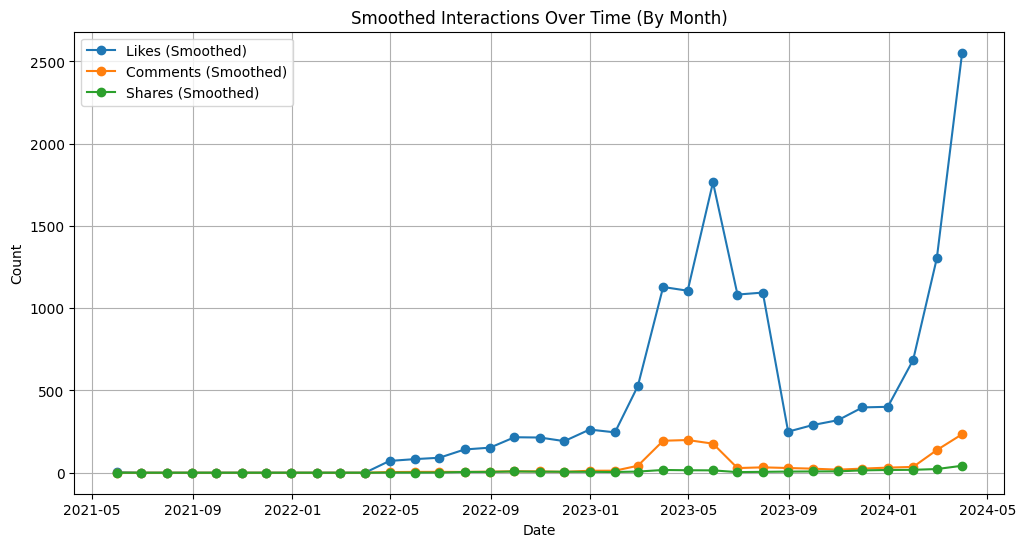

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate interactions by month
interactions_by_month = df.resample('M').agg({
    'likesCount': 'sum',
    'commentsCount': 'sum',
    'sharesCount': 'sum',
})

# Smooth data using moving averages
window_size = 3  # Adjust the window size as needed
interactions_by_month_smoothed = interactions_by_month.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(interactions_by_month_smoothed.index, interactions_by_month_smoothed['likesCount'], label='Likes (Smoothed)', marker='o')
plt.plot(interactions_by_month_smoothed.index, interactions_by_month_smoothed['commentsCount'], label='Comments (Smoothed)', marker='o')
plt.plot(interactions_by_month_smoothed.index, interactions_by_month_smoothed['sharesCount'], label='Shares (Smoothed)', marker='o')

plt.title('Smoothed Interactions Over Time (By Month)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()


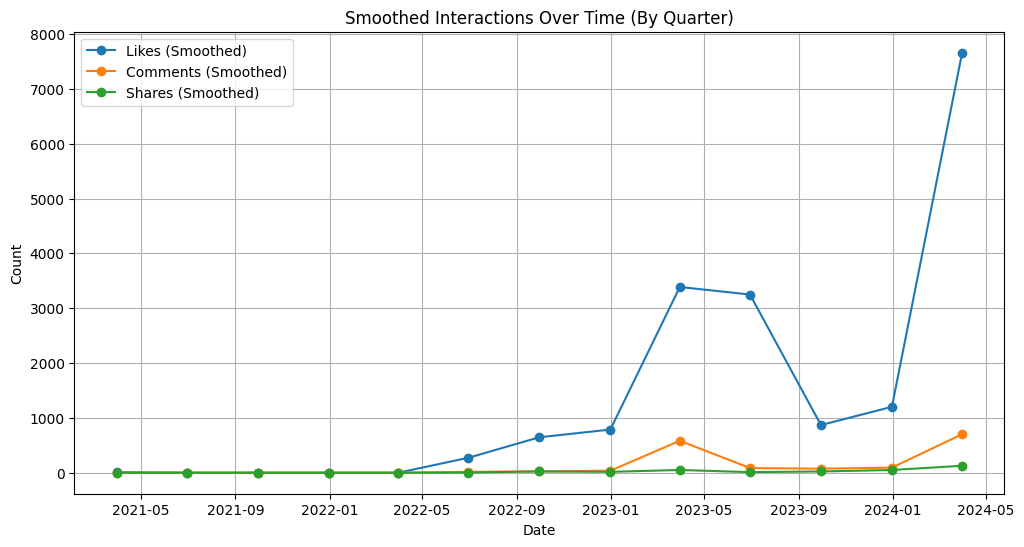

In [15]:
# Aggregate interactions by quarter
interactions_by_quarter = df.resample('Q').agg({
    'likesCount': 'sum',
    'commentsCount': 'sum',
    'sharesCount': 'sum',
})

# Smooth data using moving averages
window_size = 1  # Adjust the window size as needed
interactions_by_quarter_smoothed = interactions_by_quarter.rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(interactions_by_quarter_smoothed.index, interactions_by_quarter_smoothed['likesCount'], label='Likes (Smoothed)', marker='o')
plt.plot(interactions_by_quarter_smoothed.index, interactions_by_quarter_smoothed['commentsCount'], label='Comments (Smoothed)', marker='o')
plt.plot(interactions_by_quarter_smoothed.index, interactions_by_quarter_smoothed['sharesCount'], label='Shares (Smoothed)', marker='o')

plt.title('Smoothed Interactions Over Time (By Quarter)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

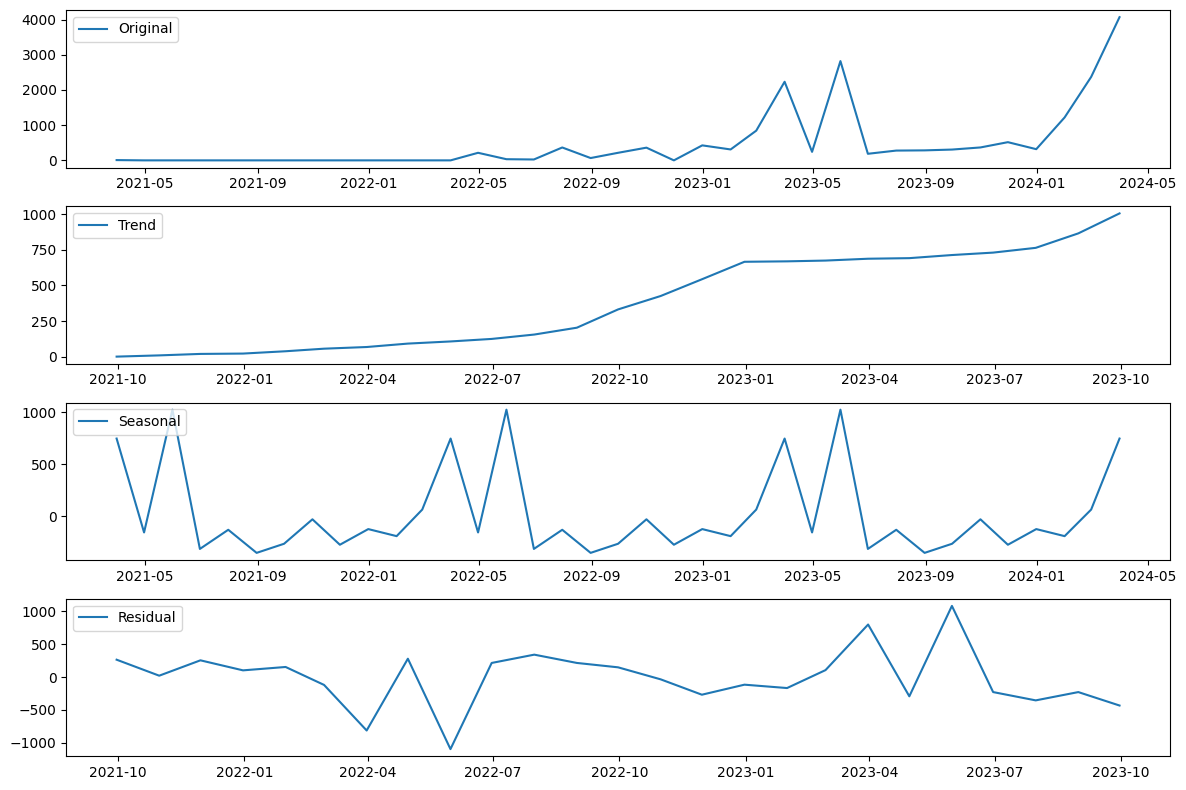

In [17]:
likes_monthly = df['likesCount'].resample('M').sum()

# Decompose the time series
decomposition = seasonal_decompose(likes_monthly, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(likes_monthly, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
df['like_group'] = pd.qcut(df['likesCount'], q=3, labels=[0, 1, 2])

# Print the counts of each group
print("Counts of each group:")

Counts of each group:


In [19]:
df['like_group'].describe()

count     385
unique      3
top         0
freq      137
Name: like_group, dtype: int64

In [20]:
df.head()

,likesCount,commentsCount,id,sharesCount,postId,hashtag,viewsCount,text,url,sharedPost,inputUrl,processed_text_vietnamese,like_group
date,,,,,,,,,,,,,
2024-03-19 05:00:40+00:00,17.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTk5NDEzNzY4NDExMD...,1.0,8.199414e+14,pensiliahcm,182.0,Có phương nào phục hồi da nhiễm Corticoid khôn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[phương, phục hồi, da, nhiễm, corticoid, bác s...",1
2024-03-19 10:37:43+00:00,2.0,0.0,UzpfSTEwMDA2NTMxOTY2NzU3NDo3NzQxNTY5NTE0MzgyOD...,0.0,7.741570e+14,pensiliahcm,NaN,LÃO HÓA TRÊN GƯƠNG MẶT BẮT ĐẦU TỪ NHỮNG DẤU HI...,https://www.facebook.com/pensiliasaigon/posts/...,NaN,NaN,"[lão, hóa, gương mặt, dấu hiệu, lão, hóa, cơ c...",0
2024-03-21 08:30:22+00:00,16.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MjEzMTg2NjY3MDMzNz...,1.0,8.213187e+14,pensiliahcm,171.0,Cấy tinh chất tạo nét cân chỉnh toàn diện gươn...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[cấy, tinh chất, nét, cân chỉnh, toàn diện, gư...",1
2023-07-19 03:12:39+00:00,18.0,2.0,UzpfSTEwMDA2MzkyODc1MDE4NTo2ODY2MjE0MjY4MTIxND...,0.0,6.866214e+14,pensiliahcm,107.0,Vài góc xinh đẹp tại Pensilia chi nhánh Đồng N...,https://www.facebook.com/PhongkhamPensiliaBien...,NaN,NaN,"[góc, xinh đẹp, pensilia, chi nhánh, đồng, nai...",1
2024-03-16 01:00:35+00:00,9.0,0.0,UzpfSTEwMDA2NDc1NzQ2Mzc1OTo4MTc5Mjc3MTAzNzU4MD...,0.0,8.179277e+14,pensiliahcm,221.0,Trán hõm má hóp có làm đầy bằng tinh chất được...,https://www.facebook.com/pensilia/posts/pfbid0...,NaN,NaN,"[trán, hõm, má, hóp, tinh chất, bs, cki hoàng ...",0


Predictive model


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the dataset
# Assuming the dataset is already loaded into a DataFrame called df

# Define the labels based on the number of likes
def label_likes(likes):
    if likes < 1500:
        return 0
    elif 1500 <= likes <= 3000:
        return 1
    else:
        return 2

df['like_label'] = df['likesCount'].apply(label_likes)

def join_text(txt):
    return ' '.join(txt)
# Prepare the data
df['processed_text_vietnamese'] = df['processed_text_vietnamese'].apply(join_text)


In [22]:

# Drop rows with missing values
df = df.dropna(subset=['like_group'])

# Split the data into train and test sets
X = df['processed_text_vietnamese']
y = df['like_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
y

date
2024-03-19 05:00:40+00:00    1
2024-03-19 10:37:43+00:00    0
2024-03-21 08:30:22+00:00    1
2023-07-19 03:12:39+00:00    1
2024-03-16 01:00:35+00:00    0
                            ..
2022-07-25 13:00:30+00:00    0
2022-07-26 01:01:03+00:00    0
2022-08-12 01:25:23+00:00    0
2024-02-25 16:38:30+00:00    0
2023-05-16 12:51:54+00:00    2
Name: like_group, Length: 385, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [24]:
X_train

date
2023-12-11 08:31:12+00:00    sai lầm kem chống nắng pensilia pensiliahcm ke...
2023-05-19 08:22:11+00:00                                                     
2023-05-29 10:10:12+00:00    căng chỉ phối kết hợp pp công nghệ trẻ hóa bsn...
2024-02-28 08:30:05+00:00    penreply chuyên da đáp làn da công nghệ tái tạ...
2023-08-25 05:00:23+00:00    chăm sóc da á vương thế giới nguyễn hữu pensil...
                                                   ...                        
2023-07-13 05:28:41+00:00    góc trưng bày sản phảm xinh đẹp pensilia pensi...
2024-02-28 00:00:00+00:00    bé mỡ bụng nỗi niềm sâu thẳm chị em phụ nữ chị...
2023-05-13 08:51:23+00:00    cách thức gấp khẩu trang pensilia túi chứa thế...
2024-02-22 14:00:51+00:00                              hi vọng quà bs xinh đẹp
2024-01-31 16:55:04+00:00    nhung luu y quan trinh đieu tri da bang laser ...
Name: processed_text_vietnamese, Length: 308, dtype: object

In [25]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()

In [41]:
tfidf_param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],  # Adjust as needed
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Adjust ngram range as needed
    'tfidf__use_idf': [True, False],
    'tfidf__smooth_idf': [True, False],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'tfidf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'tfidf__bootstrap': [True, False],  
}
# Define parameter grids for each model
# Define parameter grids for each model
rf_param_grid = {
    'clf__n_estimators': [50, 100, 200, 300, 500, 1000],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'clf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'clf__bootstrap': [True, False],
}

xgb_param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.3],
    'clf__n_estimators': [50, 100, 200],
    'clf__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'clf__subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'clf__colsample_bytree': [0.6, 0.8, 1.0]
}

svm_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'clf__degree': [3, 4, 5],  # Degree of the polynomial kernel function
    'clf__shrinking': [True, False]
}

# Define the pipeline for Random Forest
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', RandomForestClassifier())
])

# Define the pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', XGBClassifier())
])

# Define the pipeline for SVM
svm_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', SVC())
])

In [45]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)

# Grid search for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, n_jobs=-1)

# Grid search for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)

In [46]:
rf_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10], 'clf__degree': [3, 4, 5],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf'],
                         'clf__shrinking': [True, False]})

In [49]:
# After fitting, you can access the best parameters and best scores via `best_params_` and `best_score_` attributes
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best parameters for SVM:", svm_grid_search.best_params_)

Best parameters for Random Forest: {'clf__bootstrap': True, 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best parameters for XGBoost: {'clf__colsample_bytree': 1.0, 'clf__gamma': 0.1, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 1.0}
Best parameters for SVM: {'clf__C': 10, 'clf__degree': 3, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__shrinking': True}


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Evaluate XGBoost
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

# Evaluate SVM
svm_best_model = svm_grid_search.best_estimator_
svm_pred = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Print accuracy and confusion matrix
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)

print("\nSVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:\n", svm_conf_matrix)


Random Forest Accuracy: 0.6233766233766234
Random Forest Confusion Matrix:
 [[16  6  2]
 [ 3 18  8]
 [ 2  8 14]]

XGBoost Accuracy: 0.6363636363636364
XGBoost Confusion Matrix:
 [[15  5  4]
 [ 1 20  8]
 [ 1  9 14]]

SVM Accuracy: 0.5714285714285714
SVM Confusion Matrix:
 [[17  4  3]
 [ 7 12 10]
 [ 2  7 15]]


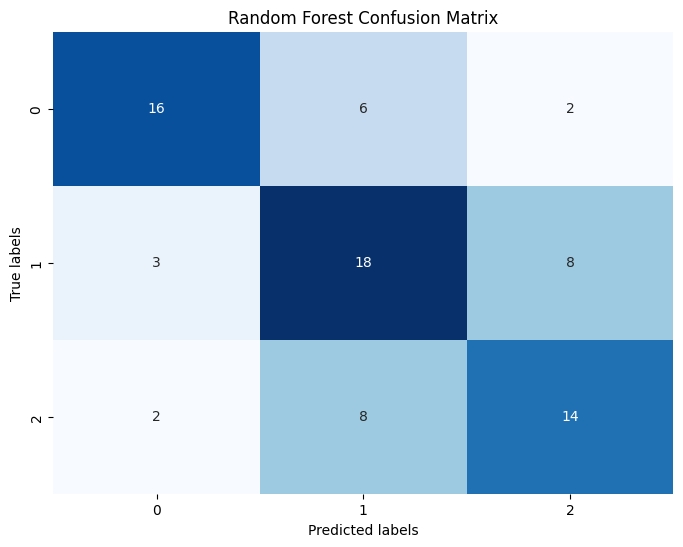

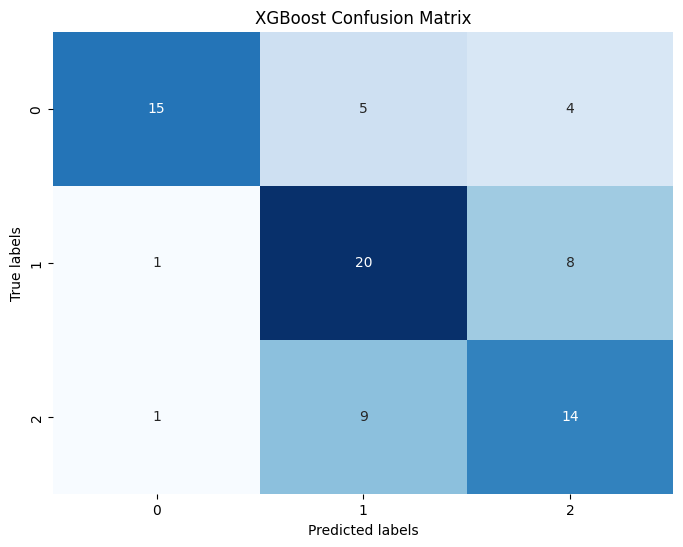

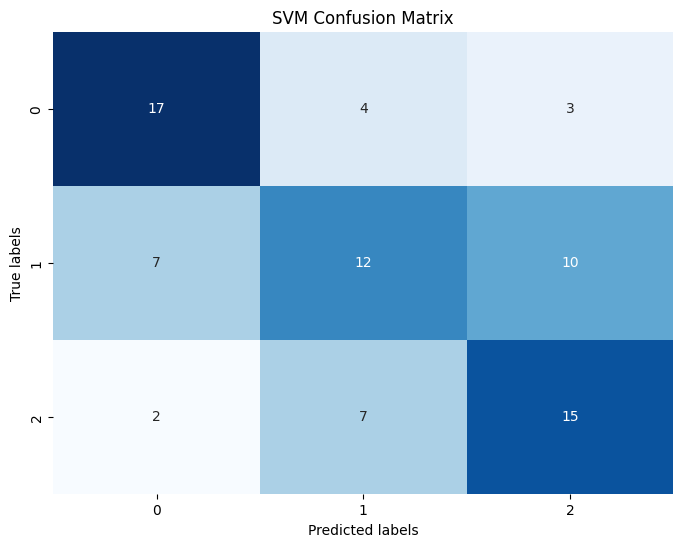

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_conf_matrix, "Random Forest Confusion Matrix")

# Plot confusion matrix for XGBoost
plot_confusion_matrix(xgb_conf_matrix, "XGBoost Confusion Matrix")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_conf_matrix, "SVM Confusion Matrix")


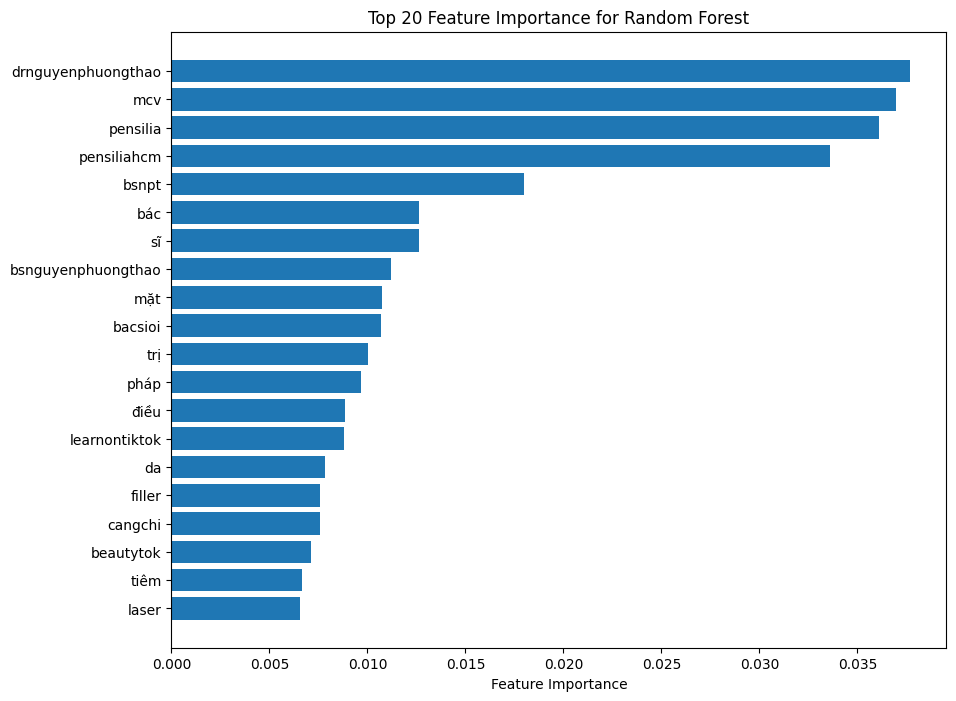

In [58]:
# Access the best estimator from Random Forest grid search
rf_best_estimator = rf_grid_search.best_estimator_

# Get feature importance from the best Random Forest estimator
feature_importance = rf_best_estimator.named_steps['clf'].feature_importances_

# Get feature names from tfidf_vectorizer
feature_names = rf_best_estimator.named_steps['tfidf'].get_feature_names_out()

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Get the top 20 feature names and importance scores
top_feature_names = [feature_names[idx] for idx in sorted_idx[:20]]
top_feature_importance = [feature_importance[idx] for idx in sorted_idx[:20]]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_feature_names)), top_feature_importance, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()
